In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import PIL
%matplotlib inline

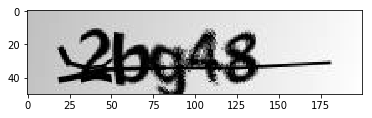

In [2]:
img = cv2.imread('2bg48.png', 0)
plt.imshow(img, 'gray')

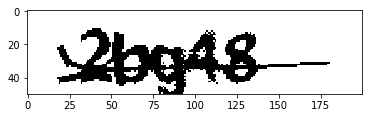

In [6]:
# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(th2, 'gray')

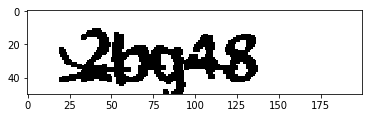

In [9]:
# Closing : Dilation + Erosion
kernel = np.ones((3,3), np.uint8)

closing = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, 'gray')